# Chi-square association test

*Pearson's chi-squared test* is used as a test of independence. It assesses whether observations consisting of measures on two variables, expressed in a contingency table, are independent of each other (e.g. polling responses from people of different nationalities to see if one's nationality is related to the response). A p-value of less than or equal to a critical point is interpreted as justification for rejecting the null hypothesis that the row variable is independent of the column variable. The alternative hypothesis corresponds to the variables having an association or relationship where the structure of this relationship is not specified.

More info: https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test#Testing_for_statistical_independence

Import dependencies and data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
%matplotlib inline

In [2]:
data = pd.read_csv("../results/dnds_for_targets.csv", index_col=0)
print(data.shape)
data.head()

(14907, 9)


,Gene name,Gene description,dN with Chimpanzee,dS with Chimpanzee,dN/dS with Chimpanzee,dN with Mouse,dS with Mouse,dN/dS with Mouse,present in DrugBank
0,MT-ATP8,mitochondrially encoded ATP synthase membrane ...,0.0325,0.3331,0.0976,0.4871,0.8480,0.5744,False
1,MT-ND6,mitochondrially encoded NADH:ubiquinone oxidor...,0.0204,0.6559,0.0311,0.3455,13.3498,0.0259,True
2,KLF13,Kruppel like factor 13 [Source:HGNC Symbol;Acc...,0.0026,0.0771,0.0337,0.0219,0.6810,0.0322,False
3,KCNE1B,potassium voltage-gated channel subfamily E re...,0.0165,0.0649,0.2542,0.1382,0.8135,0.1699,False
4,PDK3,pyruvate dehydrogenase kinase 3 [Source:HGNC S...,0.0152,0.0300,0.5067,0.0151,0.5213,0.0290,True


Filter out inf values:

In [3]:
data_filtered = data.dropna()
print(data_filtered.shape)
data_filtered = data_filtered[(data_filtered["dN/dS with Chimpanzee"] != float("inf")) & (data_filtered["dN/dS with Mouse"] != float("inf"))]
print(data_filtered.shape)
data_filtered.head()

(11882, 9)
(11480, 9)


,Gene name,Gene description,dN with Chimpanzee,dS with Chimpanzee,dN/dS with Chimpanzee,dN with Mouse,dS with Mouse,dN/dS with Mouse,present in DrugBank
0,MT-ATP8,mitochondrially encoded ATP synthase membrane ...,0.0325,0.3331,0.0976,0.4871,0.8480,0.5744,False
1,MT-ND6,mitochondrially encoded NADH:ubiquinone oxidor...,0.0204,0.6559,0.0311,0.3455,13.3498,0.0259,True
2,KLF13,Kruppel like factor 13 [Source:HGNC Symbol;Acc...,0.0026,0.0771,0.0337,0.0219,0.6810,0.0322,False
3,KCNE1B,potassium voltage-gated channel subfamily E re...,0.0165,0.0649,0.2542,0.1382,0.8135,0.1699,False
4,PDK3,pyruvate dehydrogenase kinase 3 [Source:HGNC S...,0.0152,0.0300,0.5067,0.0151,0.5213,0.0290,True


This function takes 2 rows of a contigency table and prints Chi2 test p-value:

In [4]:
def chi2_test(cont_table):
    
    stat, p, dof, expected = chi2_contingency(cont_table)
    print('significance=0.05, p={}'.format(p))

    if p <= 0.05: 
        print('dN/dS & "goodness as a target" are dependent')
    else: 
        print('dN/dS & "goodness as a target" are independent')
        
    return

## Comparison of dN/dS with 1

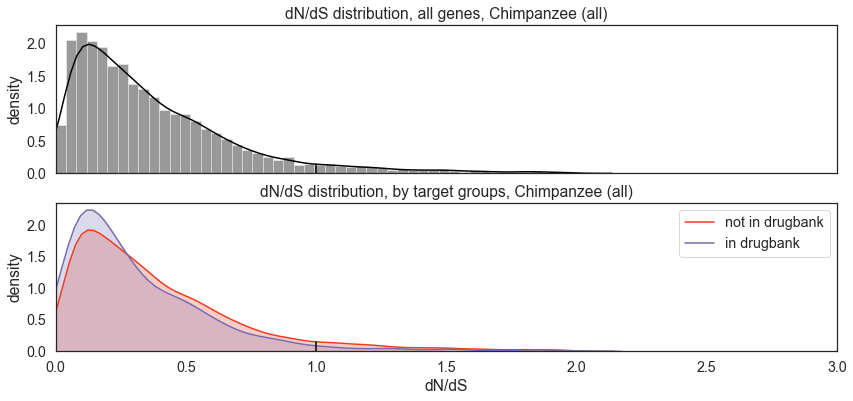

-----------------------------------
Results of Chi2 test for Chimpanzee
-----------------------------------
The contingency table looks like that:
              dN/dS < 1  dN/dS ≥ 1
bad targets        9357        704
good targets       1370         49

significance=0.05, p=5.999795685706191e-07
dN/dS & "goodness as a target" are dependent



In [5]:
# for chimpanzee vs human
sns.set(style="white", font_scale=1.3)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(14, 6),)

sns.distplot(data_filtered[data_filtered["dN/dS with Chimpanzee"] < 2]["dN/dS with Chimpanzee"] , color="#010101", kde=True, ax=ax1)

sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == False) & (data_filtered["dN/dS with Chimpanzee"] < 2)]["dN/dS with Chimpanzee"] , color="#f03b20", shade=True, label="not in drugbank", ax=ax2)
sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == True) & (data_filtered["dN/dS with Chimpanzee"] < 2)]["dN/dS with Chimpanzee"] , color="#756bb1", shade=True, label="in drugbank", ax=ax2)

ax1.axvline(1, 0, 0.06, color="#000000").set_linestyle("-")
ax2.axvline(1, 0, 0.065, color="#000000").set_linestyle("-")

ax2.legend(loc="upper right")

ax1.set_title('dN/dS distribution, all genes, Chimpanzee (all)')
ax2.set_title('dN/dS distribution, by target groups, Chimpanzee (all)')
ax1.set_xlabel('')
ax2.set_xlabel("dN/dS")
ax1.set_ylabel('density')
ax2.set_ylabel('density')

plt.xlim(0,3)
plt.show();

# Chi2 test
bad_targets = [data_filtered[(data_filtered["dN/dS with Chimpanzee"] < 1) & (data_filtered["present in DrugBank"] == False)].shape[0], 
               data_filtered[(data_filtered["dN/dS with Chimpanzee"] >= 1) & (data_filtered["present in DrugBank"] == False)].shape[0]]
good_targets = [data_filtered[(data_filtered["dN/dS with Chimpanzee"] < 1) & (data_filtered["present in DrugBank"] == True)].shape[0], 
               data_filtered[(data_filtered["dN/dS with Chimpanzee"] >= 1) & (data_filtered["present in DrugBank"] == True)].shape[0]]

print('-----------------------------------')
print('Results of Chi2 test for Chimpanzee')
print('-----------------------------------')
print('The contingency table looks like that:')
print(pd.DataFrame([bad_targets, good_targets],
                  index=['bad targets', 'good targets'],
                  columns=['dN/dS < 1', 'dN/dS ≥ 1']))
print()
chi2_test([bad_targets, good_targets])
print()

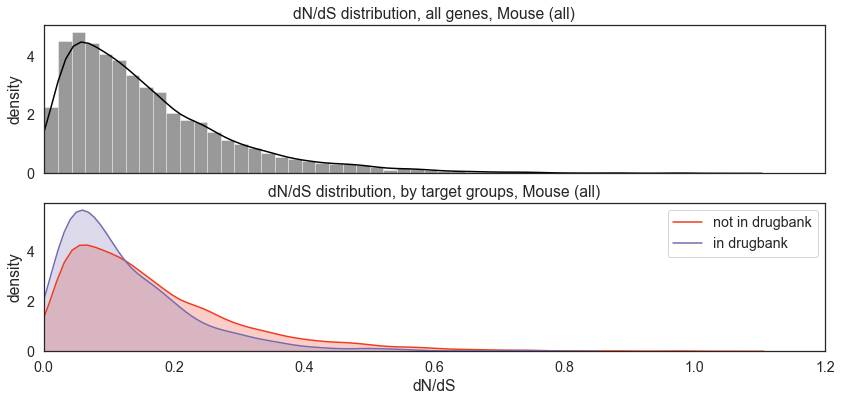

------------------------------
Results of Chi2 test for Mouse
------------------------------
The contingency table looks like that:
              dN/dS < 1  dN/dS ≥ 1
bad targets       10058          3
good targets       1419          0

significance=0.05, p=0.8207081731028516
dN/dS & "goodness as a target" are independent


In [6]:
# for mouse vs human
sns.set(style="white", font_scale=1.3)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(14, 6),)

sns.distplot(data_filtered[data_filtered["dN/dS with Mouse"] < 1.2]["dN/dS with Mouse"] , color="#010101", kde=True, ax=ax1)

sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == False) & (data_filtered["dN/dS with Mouse"] < 1.2)]["dN/dS with Mouse"] , color="#f03b20", shade=True, label="not in drugbank", ax=ax2)
sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == True) & (data_filtered["dN/dS with Mouse"] < 1.2)]["dN/dS with Mouse"] , color="#756bb1", shade=True, label="in drugbank", ax=ax2)

ax2.legend(loc="upper right")

ax1.set_title('dN/dS distribution, all genes, Mouse (all)')
ax2.set_title('dN/dS distribution, by target groups, Mouse (all)')
ax1.set_xlabel('')
ax2.set_xlabel("dN/dS")
ax1.set_ylabel('density')
ax2.set_ylabel('density')

plt.xlim(0,1.2)
plt.show();

# Chi2 test
bad_targets = [data_filtered[(data_filtered["dN/dS with Mouse"] < 1) & (data_filtered["present in DrugBank"] == False)].shape[0], 
               data_filtered[(data_filtered["dN/dS with Mouse"] >= 1) & (data_filtered["present in DrugBank"] == False)].shape[0]]
good_targets = [data_filtered[(data_filtered["dN/dS with Mouse"] < 1) & (data_filtered["present in DrugBank"] == True)].shape[0], 
               data_filtered[(data_filtered["dN/dS with Mouse"] >= 1) & (data_filtered["present in DrugBank"] == True)].shape[0]]

print('------------------------------')
print('Results of Chi2 test for Mouse')
print('------------------------------')
print('The contingency table looks like that:')
print(pd.DataFrame([bad_targets, good_targets],
                  index=['bad targets', 'good targets'],
                  columns=['dN/dS < 1', 'dN/dS ≥ 1']))
print()
chi2_test([bad_targets, good_targets])

## Comparison of dN/dS with the species average

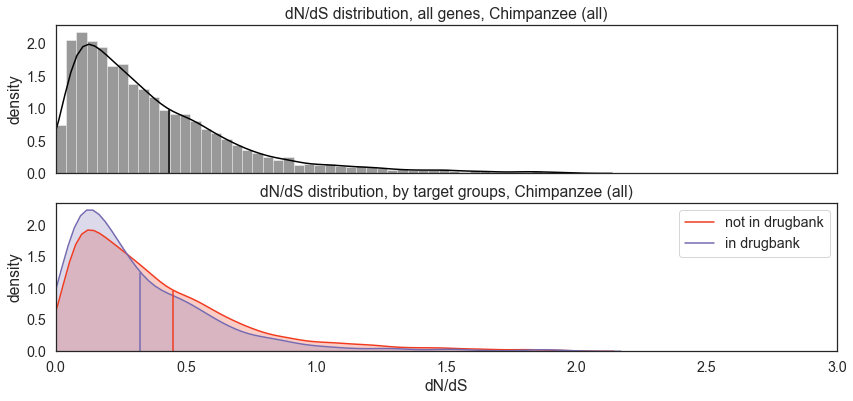

-----------------------------------
Results of Chi2 test for Chimpanzee
-----------------------------------
The contingency table looks like that:
              dN/dS < average dN/dS  dN/dS ≥ average dN/dS
bad targets                    6674                   3387
good targets                   1060                    359

Average dN/dS is 0.4354058972125436
significance=0.05, p=3.813229073735863e-10
dN/dS & "goodness as a target" are dependent



In [7]:
# for chimpanzee vs human
mean_out=data_filtered[(data_filtered["present in DrugBank"] == False)]["dN/dS with Chimpanzee"].mean()
mean_in=data_filtered[(data_filtered["present in DrugBank"] == True)]["dN/dS with Chimpanzee"].mean()
mean_dNdS = np.mean(data_filtered["dN/dS with Chimpanzee"])

sns.set(style="white", font_scale=1.3)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(14, 6),)

sns.distplot(data_filtered[data_filtered["dN/dS with Chimpanzee"] < 2]["dN/dS with Chimpanzee"] , color="#010101", kde=True, ax=ax1)

sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == False) & (data_filtered["dN/dS with Chimpanzee"] < 2)]["dN/dS with Chimpanzee"] , color="#f03b20", shade=True, label="not in drugbank", ax=ax2)
sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == True) & (data_filtered["dN/dS with Chimpanzee"] < 2)]["dN/dS with Chimpanzee"] , color="#756bb1", shade=True, label="in drugbank", ax=ax2)

ax1.axvline(mean_dNdS, 0, 0.43, color="#000000").set_linestyle("-")
ax2.axvline(mean_in, 0, 0.53, color="#756bb1").set_linestyle("-")
ax2.axvline(mean_out, 0, 0.41, color="#f03b20").set_linestyle("-")

ax2.legend(loc="upper right")

ax1.set_title('dN/dS distribution, all genes, Chimpanzee (all)')
ax2.set_title('dN/dS distribution, by target groups, Chimpanzee (all)')
ax1.set_xlabel('')
ax2.set_xlabel("dN/dS")
ax1.set_ylabel('density')
ax2.set_ylabel('density')

plt.xlim(0,3)
plt.show();

bad_targets = [data_filtered[(data_filtered["dN/dS with Chimpanzee"] < mean_dNdS) & (data_filtered["present in DrugBank"] == False)].shape[0], 
               data_filtered[(data_filtered["dN/dS with Chimpanzee"] >= mean_dNdS) & (data_filtered["present in DrugBank"] == False)].shape[0]]
good_targets = [data_filtered[(data_filtered["dN/dS with Chimpanzee"] < mean_dNdS) & (data_filtered["present in DrugBank"] == True)].shape[0], 
               data_filtered[(data_filtered["dN/dS with Chimpanzee"] >= mean_dNdS) & (data_filtered["present in DrugBank"] == True)].shape[0]]

print('-----------------------------------')
print('Results of Chi2 test for Chimpanzee')
print('-----------------------------------')
print('The contingency table looks like that:')
print(pd.DataFrame([bad_targets, good_targets],
                  index=['bad targets', 'good targets'],
                  columns=['dN/dS < average dN/dS', 'dN/dS ≥ average dN/dS']))
print()
print('Average dN/dS is {}'.format(mean_dNdS))
chi2_test([bad_targets, good_targets])
print()



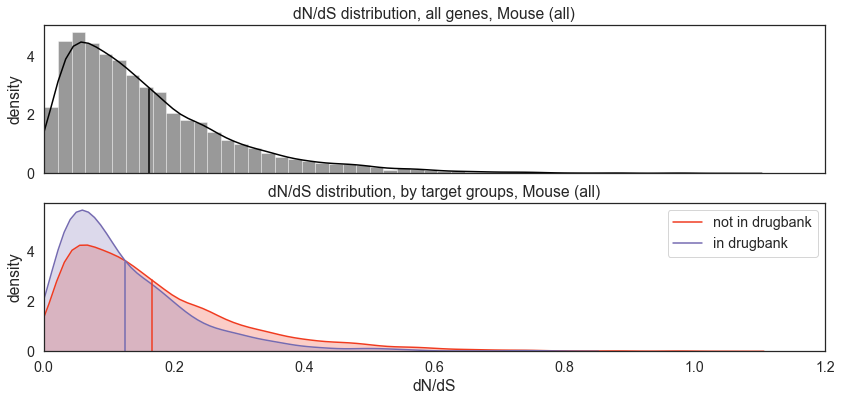

------------------------------
Results of Chi2 test for Mouse
------------------------------
The contingency table looks like that:
              dN/dS < average dN/dS  dN/dS ≥ average dN/dS
bad targets                    6038                   4023
good targets                   1043                    376

Average dN/dS is 0.1616633275261324
significance=0.05, p=1.755996317294364e-22
dN/dS & "goodness as a target" are dependent


In [8]:
# for mouse vs human
mean_out=data_filtered[(data_filtered["present in DrugBank"] == False)]["dN/dS with Mouse"].mean()
mean_in=data_filtered[(data_filtered["present in DrugBank"] == True)]["dN/dS with Mouse"].mean()
mean_dNdS = np.mean(data_filtered["dN/dS with Mouse"])

sns.set(style="white", font_scale=1.3)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(14, 6),)

sns.distplot(data_filtered[data_filtered["dN/dS with Mouse"] < 1.2]["dN/dS with Mouse"] , color="#010101", kde=True, ax=ax1)

sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == False) & (data_filtered["dN/dS with Mouse"] < 1.2)]["dN/dS with Mouse"] , color="#f03b20", shade=True, label="not in drugbank", ax=ax2)
sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == True) & (data_filtered["dN/dS with Mouse"] < 1.2)]["dN/dS with Mouse"] , color="#756bb1", shade=True, label="in drugbank", ax=ax2)

ax1.axvline(mean_dNdS, 0, 0.57, color="#000000").set_linestyle("-")
ax2.axvline(mean_in, 0, 0.6, color="#756bb1").set_linestyle("-")
ax2.axvline(mean_out, 0, 0.48, color="#f03b20").set_linestyle("-")

ax2.legend(loc="upper right")

ax1.set_title('dN/dS distribution, all genes, Mouse (all)')
ax2.set_title('dN/dS distribution, by target groups, Mouse (all)')
ax1.set_xlabel('')
ax2.set_xlabel("dN/dS")
ax1.set_ylabel('density')
ax2.set_ylabel('density')

plt.xlim(0,1.2)
plt.show();

bad_targets = [data_filtered[(data_filtered["dN/dS with Mouse"] < mean_dNdS) & (data_filtered["present in DrugBank"] == False)].shape[0], 
               data_filtered[(data_filtered["dN/dS with Mouse"] >= mean_dNdS) & (data_filtered["present in DrugBank"] == False)].shape[0]]
good_targets = [data_filtered[(data_filtered["dN/dS with Mouse"] < mean_dNdS) & (data_filtered["present in DrugBank"] == True)].shape[0], 
               data_filtered[(data_filtered["dN/dS with Mouse"] >= mean_dNdS) & (data_filtered["present in DrugBank"] == True)].shape[0]]

print('------------------------------')
print('Results of Chi2 test for Mouse')
print('------------------------------')
print('The contingency table looks like that:')
print(pd.DataFrame([bad_targets, good_targets],
                  index=['bad targets', 'good targets'],
                  columns=['dN/dS < average dN/dS', 'dN/dS ≥ average dN/dS']))
print()
print('Average dN/dS is {}'.format(mean_dNdS))
chi2_test([bad_targets, good_targets])

## Comparison of dN/dS with the species median

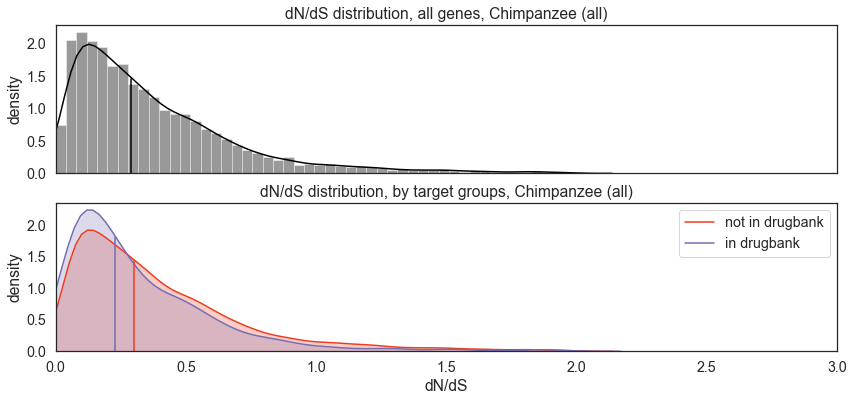

-----------------------------------
Results of Chi2 test for Chimpanzee
-----------------------------------
The contingency table looks like that:
              dN/dS < median dN/dS  dN/dS ≥ median dN/dS
bad targets                   4900                  5161
good targets                   840                   579

Median dN/dS is 0.2891
significance=0.05, p=1.670796332263025e-13
dN/dS & "goodness as a target" are dependent



In [9]:
# for chimpanzee vs human
median_dNdS = np.median(data_filtered["dN/dS with Chimpanzee"])
median_out=data_filtered[(data_filtered["present in DrugBank"] == False)]["dN/dS with Chimpanzee"].median()
median_in=data_filtered[(data_filtered["present in DrugBank"] == True)]["dN/dS with Chimpanzee"].median()

sns.set(style="white", font_scale=1.3)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(14, 6),)

sns.distplot(data_filtered[data_filtered["dN/dS with Chimpanzee"] < 2]["dN/dS with Chimpanzee"] , color="#010101", kde=True, ax=ax1)

sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == False) & (data_filtered["dN/dS with Chimpanzee"] < 2)]["dN/dS with Chimpanzee"] , color="#f03b20", shade=True, label="not in drugbank", ax=ax2)
sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == True) & (data_filtered["dN/dS with Chimpanzee"] < 2)]["dN/dS with Chimpanzee"] , color="#756bb1", shade=True, label="in drugbank", ax=ax2)

ax1.axvline(median_dNdS, 0, 0.64, color="#000000").set_linestyle("-")
ax2.axvline(median_in, 0, 0.77, color="#756bb1").set_linestyle("-")
ax2.axvline(median_out, 0, 0.61, color="#f03b20").set_linestyle("-")

ax2.legend(loc="upper right")

ax1.set_title('dN/dS distribution, all genes, Chimpanzee (all)')
ax2.set_title('dN/dS distribution, by target groups, Chimpanzee (all)')
ax1.set_xlabel('')
ax2.set_xlabel("dN/dS")
ax1.set_ylabel('density')
ax2.set_ylabel('density')

plt.xlim(0,3)
plt.show();

bad_targets = [data_filtered[(data_filtered["dN/dS with Chimpanzee"] < median_dNdS) & (data_filtered["present in DrugBank"] == False)].shape[0], 
               data_filtered[(data_filtered["dN/dS with Chimpanzee"] >= median_dNdS) & (data_filtered["present in DrugBank"] == False)].shape[0]]
good_targets = [data_filtered[(data_filtered["dN/dS with Chimpanzee"] < median_dNdS) & (data_filtered["present in DrugBank"] == True)].shape[0], 
               data_filtered[(data_filtered["dN/dS with Chimpanzee"] >= median_dNdS) & (data_filtered["present in DrugBank"] == True)].shape[0]]

print('-----------------------------------')
print('Results of Chi2 test for Chimpanzee')
print('-----------------------------------')
print('The contingency table looks like that:')
print(pd.DataFrame([bad_targets, good_targets],
                  index=['bad targets', 'good targets'],
                  columns=['dN/dS < median dN/dS', 'dN/dS ≥ median dN/dS']))
print()
print('Median dN/dS is {}'.format(median_dNdS))
chi2_test([bad_targets, good_targets])
print()



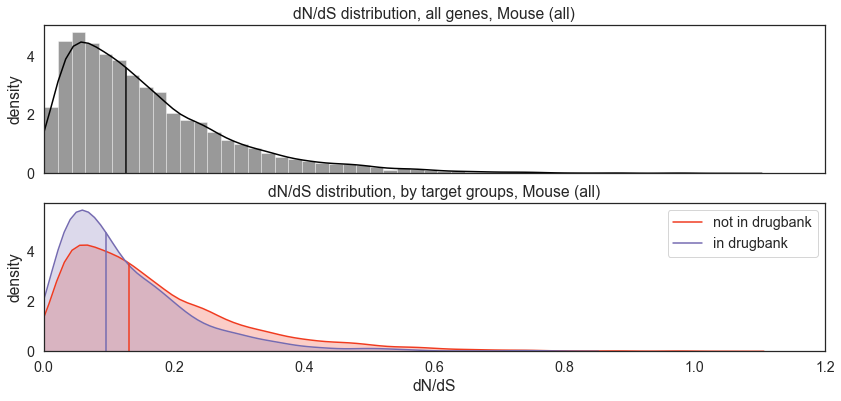

------------------------------
Results of Chi2 test for Mouse
------------------------------
The contingency table looks like that:
              dN/dS < median dN/dS  dN/dS ≥ median dN/dS
bad targets                   4853                  5208
good targets                   886                   533

Median dN/dS is 0.126
significance=0.05, p=1.7089529458238718e-23
dN/dS & "goodness as a target" are dependent


In [10]:
# for mouse vs human
median_dNdS = np.median(data_filtered["dN/dS with Mouse"])
median_out=data_filtered[(data_filtered["present in DrugBank"] == False)]["dN/dS with Mouse"].median()
median_in=data_filtered[(data_filtered["present in DrugBank"] == True)]["dN/dS with Mouse"].median()

sns.set(style="white", font_scale=1.3)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(14, 6),)

sns.distplot(data_filtered[data_filtered["dN/dS with Mouse"] < 1.2]["dN/dS with Mouse"] , color="#010101", kde=True, ax=ax1)

sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == False) & (data_filtered["dN/dS with Mouse"] < 1.2)]["dN/dS with Mouse"] , color="#f03b20", shade=True, label="not in drugbank", ax=ax2)
sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == True) & (data_filtered["dN/dS with Mouse"] < 1.2)]["dN/dS with Mouse"] , color="#756bb1", shade=True, label="in drugbank", ax=ax2)

ax1.axvline(median_dNdS, 0, 0.71, color="#000000").set_linestyle("-")
ax2.axvline(median_in, 0, 0.8, color="#756bb1").set_linestyle("-")
ax2.axvline(median_out, 0, 0.59, color="#f03b20").set_linestyle("-")

ax2.legend(loc="upper right")

ax1.set_title('dN/dS distribution, all genes, Mouse (all)')
ax2.set_title('dN/dS distribution, by target groups, Mouse (all)')
ax1.set_xlabel('')
ax2.set_xlabel("dN/dS")
ax1.set_ylabel('density')
ax2.set_ylabel('density')

plt.xlim(0,1.2)
plt.show();

bad_targets = [data_filtered[(data_filtered["dN/dS with Mouse"] < median_dNdS) & (data_filtered["present in DrugBank"] == False)].shape[0], 
               data_filtered[(data_filtered["dN/dS with Mouse"] >= median_dNdS) & (data_filtered["present in DrugBank"] == False)].shape[0]]
good_targets = [data_filtered[(data_filtered["dN/dS with Mouse"] < median_dNdS) & (data_filtered["present in DrugBank"] == True)].shape[0], 
               data_filtered[(data_filtered["dN/dS with Mouse"] >= median_dNdS) & (data_filtered["present in DrugBank"] == True)].shape[0]]

print('------------------------------')
print('Results of Chi2 test for Mouse')
print('------------------------------')
print('The contingency table looks like that:')
print(pd.DataFrame([bad_targets, good_targets],
                  index=['bad targets', 'good targets'],
                  columns=['dN/dS < median dN/dS', 'dN/dS ≥ median dN/dS']))
print()
print('Median dN/dS is {}'.format(median_dNdS))
chi2_test([bad_targets, good_targets])

## Comparison of dN/dS with the 95% quantile

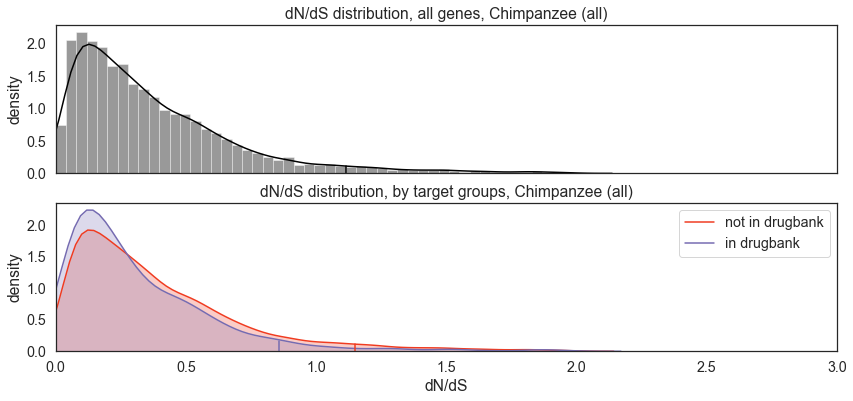

-----------------------------------
Results of Chi2 test for Chimpanzee
-----------------------------------
The contingency table looks like that:
              dN/dS < 95% quantile  dN/dS ≥ 95% quantile
bad targets                   9524                   537
good targets                  1382                    37

95% quantile of dN/dS dist is 1.1143249999999996
significance=0.05, p=1.3478041667033083e-05
dN/dS & "goodness as a target" are dependent



In [11]:
# for chimpanzee vs human
quantile_95_dNdS = np.quantile(data_filtered["dN/dS with Chimpanzee"], 0.95)
quantile_95_out=np.quantile(data_filtered[(data_filtered["present in DrugBank"] == False)]["dN/dS with Chimpanzee"], 0.95)
quantile_95_in=np.quantile(data_filtered[(data_filtered["present in DrugBank"] == True)]["dN/dS with Chimpanzee"], 0.95)

sns.set(style="white", font_scale=1.3)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(14, 6),)

sns.distplot(data_filtered[data_filtered["dN/dS with Chimpanzee"] < 2]["dN/dS with Chimpanzee"] , color="#010101", kde=True, ax=ax1)

sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == False) & (data_filtered["dN/dS with Chimpanzee"] < 2)]["dN/dS with Chimpanzee"] , color="#f03b20", shade=True, label="not in drugbank", ax=ax2)
sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == True) & (data_filtered["dN/dS with Chimpanzee"] < 2)]["dN/dS with Chimpanzee"] , color="#756bb1", shade=True, label="in drugbank", ax=ax2)

ax1.axvline(quantile_95_dNdS, 0, 0.05, color="#000000").set_linestyle("-")
ax2.axvline(quantile_95_in, 0, 0.07, color="#756bb1").set_linestyle("-")
ax2.axvline(quantile_95_out, 0, 0.05, color="#f03b20").set_linestyle("-")

ax2.legend(loc="upper right")

ax1.set_title('dN/dS distribution, all genes, Chimpanzee (all)')
ax2.set_title('dN/dS distribution, by target groups, Chimpanzee (all)')
ax1.set_xlabel('')
ax2.set_xlabel("dN/dS")
ax1.set_ylabel('density')
ax2.set_ylabel('density')

plt.xlim(0,3)
plt.show();

bad_targets = [data_filtered[(data_filtered["dN/dS with Chimpanzee"] < quantile_95_dNdS) & (data_filtered["present in DrugBank"] == False)].shape[0], 
               data_filtered[(data_filtered["dN/dS with Chimpanzee"] >= quantile_95_dNdS) & (data_filtered["present in DrugBank"] == False)].shape[0]]
good_targets = [data_filtered[(data_filtered["dN/dS with Chimpanzee"] < quantile_95_dNdS) & (data_filtered["present in DrugBank"] == True)].shape[0], 
               data_filtered[(data_filtered["dN/dS with Chimpanzee"] >= quantile_95_dNdS) & (data_filtered["present in DrugBank"] == True)].shape[0]]

print('-----------------------------------')
print('Results of Chi2 test for Chimpanzee')
print('-----------------------------------')
print('The contingency table looks like that:')
print(pd.DataFrame([bad_targets, good_targets],
                  index=['bad targets', 'good targets'],
                  columns=['dN/dS < 95% quantile', 'dN/dS ≥ 95% quantile']))
print()
print('95% quantile of dN/dS dist is {}'.format(quantile_95_dNdS))
chi2_test([bad_targets, good_targets])
print()


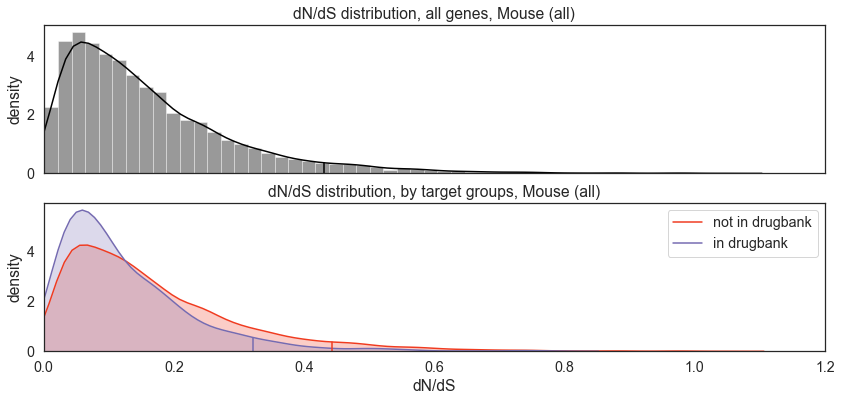

------------------------------
Results of Chi2 test for Mouse
------------------------------
The contingency table looks like that:
              dN/dS < 95% quantile  dN/dS ≥ 95% quantile
bad targets                   9513                   548
good targets                  1393                    26

95% quantile of dN/dS dist is 0.429905
significance=0.05, p=7.320048524628093e-09
dN/dS & "goodness as a target" are dependent


In [12]:
# for mouse vs human
quantile_95_dNdS = np.quantile(data_filtered["dN/dS with Mouse"], 0.95)
quantile_95_out=np.quantile(data_filtered[(data_filtered["present in DrugBank"] == False)]["dN/dS with Mouse"], 0.95)
quantile_95_in=np.quantile(data_filtered[(data_filtered["present in DrugBank"] == True)]["dN/dS with Mouse"], 0.95)

sns.set(style="white", font_scale=1.3)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(14, 6),)

sns.distplot(data_filtered[data_filtered["dN/dS with Mouse"] < 1.2]["dN/dS with Mouse"] , color="#010101", kde=True, ax=ax1)

sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == False) & (data_filtered["dN/dS with Mouse"] < 1.2)]["dN/dS with Mouse"] , color="#f03b20", shade=True, label="not in drugbank", ax=ax2)
sns.kdeplot(data_filtered[(data_filtered["present in DrugBank"] == True) & (data_filtered["dN/dS with Mouse"] < 1.2)]["dN/dS with Mouse"] , color="#756bb1", shade=True, label="in drugbank", ax=ax2)

ax1.axvline(quantile_95_dNdS, 0, 0.07, color="#000000").set_linestyle("-")
ax2.axvline(quantile_95_in, 0, 0.09, color="#756bb1").set_linestyle("-")
ax2.axvline(quantile_95_out, 0, 0.06, color="#f03b20").set_linestyle("-")

ax2.legend(loc="upper right")

ax1.set_title('dN/dS distribution, all genes, Mouse (all)')
ax2.set_title('dN/dS distribution, by target groups, Mouse (all)')
ax1.set_xlabel('')
ax2.set_xlabel("dN/dS")
ax1.set_ylabel('density')
ax2.set_ylabel('density')

plt.xlim(0,1.2)
plt.show();

bad_targets = [data_filtered[(data_filtered["dN/dS with Mouse"] < quantile_95_dNdS) & (data_filtered["present in DrugBank"] == False)].shape[0], 
               data_filtered[(data_filtered["dN/dS with Mouse"] >= quantile_95_dNdS) & (data_filtered["present in DrugBank"] == False)].shape[0]]
good_targets = [data_filtered[(data_filtered["dN/dS with Mouse"] < quantile_95_dNdS) & (data_filtered["present in DrugBank"] == True)].shape[0], 
               data_filtered[(data_filtered["dN/dS with Mouse"] >= quantile_95_dNdS) & (data_filtered["present in DrugBank"] == True)].shape[0]]

print('------------------------------')
print('Results of Chi2 test for Mouse')
print('------------------------------')
print('The contingency table looks like that:')
print(pd.DataFrame([bad_targets, good_targets],
                  index=['bad targets', 'good targets'],
                  columns=['dN/dS < 95% quantile', 'dN/dS ≥ 95% quantile']))
print()
print('95% quantile of dN/dS dist is {}'.format(quantile_95_dNdS))
chi2_test([bad_targets, good_targets])
